# Intuition for the G-form of VFE (Chapter 4)

This notebook covers the code to generate Figure 4.8 in Chapter 4 of the textbook "Fundamentals of Active Inference".

==========================================================================
* **Author**: Sanjeev Namjoshi (sanjeev.namjoshi@gmail.com)

* **Version**: 0.1

*This Jupyter notebook should only be distributed to members of the "Fundamentals of Active Inference" reading group hosted by the Active Inference Institute.*

Package versions:
* matplotlib==3.5.3
* numpy==1.21.5
* pyro-ppl==1.8.4
* pytorch==1.13.1

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import torch

from pyro.distributions import Normal, Uniform, MultivariateNormal
from scipy.special import psi, gamma

plt.rcParams.update({
    "figure.dpi": 120})


The $\boldsymbol{G}-\text{form}$ of VFE is written in the following way:

$$
\boldsymbol{G}-\text{form} : \hspace{5mm} \mathcal{F}_G = \int q(x) \log \frac{q(x)}{p(x, y)} dx
$$

This suggests that this is a kind of KL-divergence between $q(x)$ and the generative model, $p(x, y)$. The intuition for this is that the generative model has the same shape as the posterior but only differs from it proportionally, up to a normalization constant. This constant is the evidence. The visualization below tries to illustrate this fact.

In [2]:
x_range = torch.linspace(-5, 5, 500)
true = torch.exp(Normal(loc=0, scale=1.5).log_prob(x_range))
gen_model = true / 3   # Divide by arbitrary proportionality constant

<Figure size 720x480 with 0 Axes>

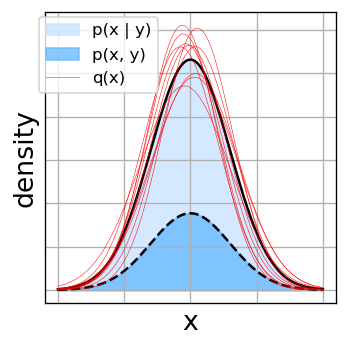

In [3]:
fig = plt.figure()
fig, ax = plt.subplots(1, 1, facecolor=(1,1,1), figsize=(3,3))

ax.plot(x_range, true, c="black")
ax.fill_between(x_range, true, color="#C6E2FF", alpha=0.75, label="p(x | y)")
ax.plot(x_range, gen_model, c="black", ls="--")
ax.fill_between(x_range, gen_model, color="#63B8FF", alpha=0.75, label="p(x, y)")

n_qs = 9

# Plot some random q(x) dists
for i in range(n_qs):
    mean = Uniform(-0.4, 0.4).sample()
    var = Uniform(1.3, 1.7).sample()
    pdf = torch.exp(Normal(loc=mean, scale=var).log_prob(x_range))
    ax.plot(x_range, pdf, c="red", lw=0.3)
    
mean = Uniform(-0.4, 0.4).sample()
var = Uniform(1.3, 1.7).sample()
pdf = torch.exp(Normal(loc=mean, scale=var).log_prob(x_range))
ax.plot(x_range, pdf, c="red", lw=0.3, label="q(x)")
    
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('density', fontsize=16)
ax.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    left=False,         
    labelbottom=False,
    labelleft=False)

plt.grid()
fig.legend(loc="upper right", frameon=True, bbox_to_anchor=(0.48, 0.96))
fig.tight_layout()

What this plot attempts to illustrate is that the generate model is the same shape as the posterior up to a proportionality constant. Normalization pushes it up to the same shape. $q(x)$ is chosen on the basis that it pushes the generative model up to the true posterior based on bounding the normalization, evidence.